<a href="https://colab.research.google.com/github/FerdousJUST/fish-classification-project-three-98-acquracy/blob/main/Fish_Classification_Project_Three.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import imageio
import pathlib
%matplotlib inline

In [22]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [23]:
from keras.preprocessing.image import ImageDataGenerator
rescaled = ImageDataGenerator(1/255)
train_fed = rescaled.flow_from_directory(
    '/content/drive/Shareddrives/Research Collaboration/Image_Classification_Dataset/Training',
                                target_size=(128,128),batch_size=32,class_mode= 'categorical') 
test_fed = rescaled.flow_from_directory(
    '/content/drive/Shareddrives/Research Collaboration/Image_Classification_Dataset/Validation',
                                target_size=(128,128),batch_size=32,class_mode= 'categorical')

Found 4800 images belonging to 4 classes.
Found 1200 images belonging to 4 classes.


In [24]:
from tensorflow.keras.layers import Input,Flatten,Dense
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential

In [25]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,kernel_size=(3,3),activation = 'relu',input_shape = (128,128,3)),
                                    tf.keras.layers.MaxPool2D(2,2), 
                                    
                                    tf.keras.layers.Conv2D(32,kernel_size=(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2), 

                                    tf.keras.layers.Conv2D(64,kernel_size=(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2), 

                                    tf.keras.layers.Conv2D(128,kernel_size=(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),

                                    tf.keras.layers.Conv2D(256,kernel_size=(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),                                  

                                    tf.keras.layers.Flatten(),

                                    tf.keras.layers.Dense(512,activation = 'relu'),
                                    tf.keras.layers.Dropout(0.5),
                                    tf.keras.layers.Dense(4,activation = 'softmax')
                                    ])

In [26]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 63, 63, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 30, 30, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 14, 14, 64)      

In [27]:
from tensorflow.keras.optimizers import Adam
model.compile(loss = 'categorical_crossentropy',optimizer = 'Adam',metrics = ['accuracy'])

In [28]:
from keras.callbacks import EarlyStopping,ModelCheckpoint,ReduceLROnPlateau
import h5py

In [29]:
erl_stop = EarlyStopping(monitor = 'val_loss',patience = 3,restore_best_weights=True)
mod_chk = ModelCheckpoint(
    filepath='/content/drive/Shareddrives/Research Collaboration/Ferdous MSc Project/part two/my_model.hdf5',
                          monitor = 'val_loss',save_best_only = True)
lr_rate = ReduceLROnPlateau(monitor = 'val_loss',patience = 3,factor = 0.1)

In [30]:
hist = model.fit_generator(train_fed, shuffle = True, epochs=10, validation_data=test_fed,
                           callbacks = [erl_stop,mod_chk,lr_rate],verbose = 2
                           )

<ipython-input-30-da3407ffa4b4>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(train_fed, shuffle = True, epochs=10, validation_data=test_fed,
/usr/local/lib/python3.8/dist-packages/keras/preprocessing/image.py:1663: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/10
150/150 - 37s - loss: 1.8068 - accuracy: 0.6646 - val_loss: 0.5526 - val_accuracy: 0.7858 - lr: 0.0010 - 37s/epoch - 243ms/step
Epoch 2/10
150/150 - 35s - loss: 0.3052 - accuracy: 0.8935 - val_loss: 0.2433 - val_accuracy: 0.9058 - lr: 0.0010 - 35s/epoch - 233ms/step
Epoch 3/10
150/150 - 35s - loss: 0.1767 - accuracy: 0.9369 - val_loss: 0.2402 - val_accuracy: 0.9183 - lr: 0.0010 - 35s/epoch - 232ms/step
Epoch 4/10
150/150 - 36s - loss: 0.2194 - accuracy: 0.9240 - val_loss: 0.1762 - val_accuracy: 0.9333 - lr: 0.0010 - 36s/epoch - 241ms/step
Epoch 5/10
150/150 - 35s - loss: 0.1247 - accuracy: 0.9569 - val_loss: 0.1189 - val_accuracy: 0.9583 - lr: 0.0010 - 35s/epoch - 233ms/step
Epoch 6/10
150/150 - 35s - loss: 0.0697 - accuracy: 0.9735 - val_loss: 0.1174 - val_accuracy: 0.9600 - lr: 0.0010 - 35s/epoch - 234ms/step
Epoch 7/10
150/150 - 35s - loss: 0.0925 - accuracy: 0.9710 - val_loss: 0.0399 - val_accuracy: 0.9867 - lr: 0.0010 - 35s/epoch - 231ms/step
Epoch 8/10
150/150 - 35s - 

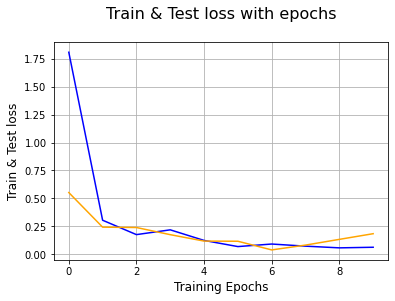

In [31]:
plt.plot(hist.history['loss'],color = 'blue',label = 'train')
plt.plot(hist.history['val_loss'],color = 'orange',label = 'train')
plt.grid(True)
plt.title("Train & Test loss with epochs\n",fontsize = 16)
plt.xlabel("Training Epochs",fontsize= 12)
plt.ylabel("Train & Test loss",fontsize =12)
plt.show()

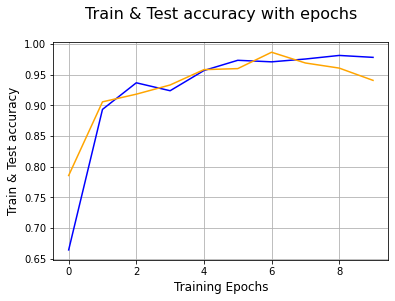

In [32]:
plt.plot(hist.history['accuracy'],color = 'blue',label = 'train')
plt.plot(hist.history['val_accuracy'],color = 'orange',label = 'train')
plt.grid(True)
plt.title("Train & Test accuracy with epochs\n",fontsize = 16)
plt.xlabel("Training Epochs",fontsize= 12)
plt.ylabel("Train & Test accuracy",fontsize =12)
plt.show()

In [33]:
acc = model.evaluate(test_fed,steps = len(test_fed),verbose = 2)
print('%.2f'%(acc[1]*100))

38/38 - 7s - loss: 0.0399 - accuracy: 0.9867 - 7s/epoch - 175ms/step
98.67


In [34]:
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np
y_pred = hist.predict(train_fed)
y_pred_classes = [np.argmax(element) for element in y_pred]
print("Classification Report:\n ",classification_report(test_fed,y_pred_classes))

AttributeError: ignored